<a href="https://colab.research.google.com/github/Elsamto/Machine-Learning/blob/main/GUIA_ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redes Neuronales Artificiales

## 🧠 ¿Qué es una Red Neuronal?

Una red neuronal artificial es un modelo inspirado en el cerebro humano que aprende a partir de datos. Se compone de "neuronas" conectadas entre sí que transforman y transmiten información.

### 📚 Analogía:
Imagina una red neuronal como un conjunto de **interruptores de luz** conectados. Cada interruptor recibe una señal (entrada), decide si se enciende (procesamiento) y pasa la señal a los siguientes interruptores (salida).

In [ ]:
## 🏗️ Arquitectura Básica de una ANN

Una red neuronal tiene **capas**:

- **Capa de entrada (Input Layer):** Recibe los datos originales (por ejemplo, pixeles de una imagen o columnas de un dataset).
- **Capas ocultas (Hidden Layers):** Procesan la información y extraen patrones o relaciones.
- **Capa de salida (Output Layer):** Devuelve la predicción del modelo

## ⚙️ ¿Qué es una función de activación?

Una **función de activación** es una fórmula que determina si una neurona debe activarse o no, dependiendo del valor que recibe como entrada.

### 📦 Analogía:
Imagina una neurona como un **interruptor con dimmer**:
- Si la señal es débil, puede apagarse (0).
- Si la señal es fuerte, puede encenderse (1) o activarse parcialmente (como subir el volumen).
Sin una función de activación, la red solo podría resolver problemas **lineales** (como una recta), y no aprender patrones complejos.

Sin una función de activación, la red solo podría resolver problemas **lineales** (como una recta), y no aprender patrones complejos.


## 🎯 ¿Por qué necesitamos introducir no linealidad?

Sin una función de activación, la red neuronal solo haría multiplicaciones y sumas. Sería como una sola ecuación lineal, sin capacidad para resolver curvas, patrones complejos o clasificaciones más difíciles.

Al usar funciones de activación como **ReLU, Sigmoid o Tanh**, introducimos **no linealidad**, lo que permite a la red neuronal aprender:

- Clasificación no lineal (curvas, espirales).
- Reconocimiento de patrones complejos.
- Procesamiento de imágenes, lenguaje o secuencias.

Al usar funciones de activación no lineales como **ReLU, Sigmoid o Tanh**, la red puede aprender relaciones mucho más complejas.


## 🔢 Funciones de activación: comparativa

| Función    | Característica                        | 3 ejemplos donde más destacan                                                   |
|------------|----------------------------------------|----------------------------------------------------------------------------------|
| **ReLU**   | Activa solo valores positivos (`f(x) = max(0, x)`) | - Visión por computadora (CNN)<br>- Reconocimiento facial<br>- Modelos de clasificación en datos estructurados |
| **Sigmoid**| Devuelve valores entre 0 y 1, útil para probabilidades (`f(x) = 1 / (1 + e^(-x))`) | - Clasificación binaria<br>- Modelos médicos probabilísticos<br>- Detección de fraude |
| **Tanh**   | Centra la salida entre -1 y 1, más balanceado que Sigmoid (`f(x) = tanh(x)`) | - Modelos de series temporales<br>- Análisis de sentimientos<br>- RNNs para lenguaje natural |


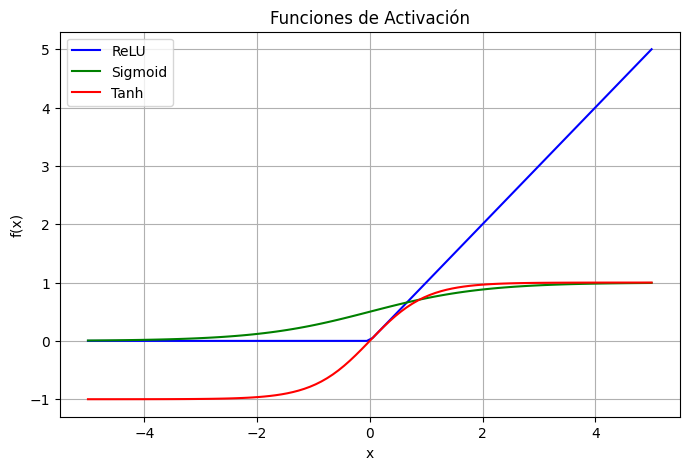

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)

# ReLU
relu = np.maximum(0, x)
# Sigmoid
sigmoid = 1 / (1 + np.exp(-x))
# Tanh
tanh = np.tanh(x)

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(x, relu, label='ReLU', color='blue')
plt.plot(x, sigmoid, label='Sigmoid', color='green')
plt.plot(x, tanh, label='Tanh', color='red')

plt.title("Funciones de Activación")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


# Relu

Los valores negativos se transforman en 0, como si la neurona los ignorara.

Solo se "activan" las neuronas cuando la entrada es mayor a 0

+ Eficiencia (al ignorar valores nulo no gasta recursos)

ReLU no aplasta los valores grandes como otras funciones (sigmoid o tanh), lo que evita que el modelo aprenda muy lento.  
  Así, la red **aprende más rápido y de forma más eficiente**

  
Es la funcion mas usada para reconocimiento de iamgenes como traductor

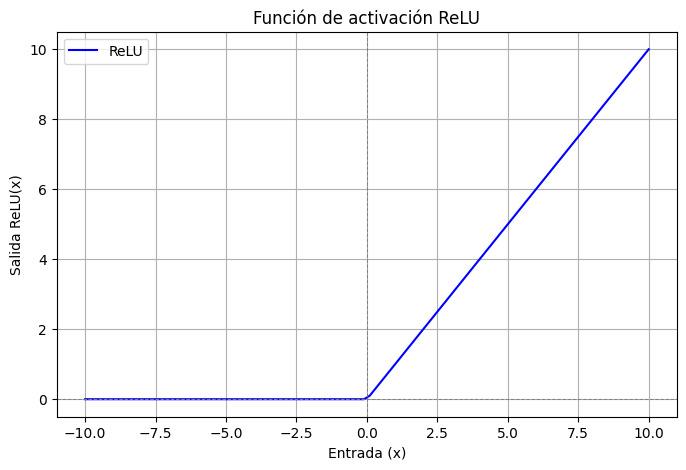

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de entrada (pueden representar estímulos, señales, etc.)
x = np.linspace(-10, 10, 100)  # 100 valores entre -10 y 10

# Función ReLU
def relu(x):
    return np.maximum(0, x)

# Aplicamos la función
y = relu(x)

# Visualización
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='ReLU', color='blue')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.title("Función de activación ReLU")
plt.xlabel("Entrada (x)")
plt.ylabel("Salida ReLU(x)")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# Importar librerías
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Cargar el dataset Iris
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode las etiquetas (porque es clasificación multiclase)
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Crear el modelo
model = Sequential([
    Dense(8, input_shape=(4,), activation='relu'),  # Capa oculta con ReLU
    Dense(3, activation='softmax')  # Capa de salida para clasificación multiclase
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=0)

# Evaluar
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en test: {accuracy:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Precisión en test: 0.97


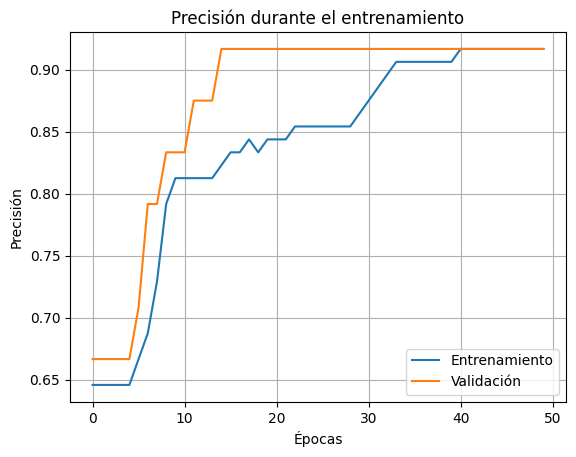

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()


## Casos de Uso Relu
1. Reconocimiento de imagenes
2. Reconocimiento de escritura
3. reconocimiento facial
4. REconocimiento de voz
5. Diagnositco medico pro imagenes
6. Clasificacion de productos
7. Conducion autonoma
8. prediccion de precios
9. Analisis genetico(patrones de enfermedades)
10. Deteccion de fraudes

In [ ]:
# 🧠 Clasificación de dígitos manuscritos (MNIST) con ReLU

## 1. Importar librerías
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

#cargar datos del mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#normaliza valroes 2.55 a 0-1
X_train = X_train / 255
X_test = X_test / 255

# One-hot encode las etiquetas
y_train_encoded = to_categorical(y_train, num_classes=10)
y_test_encoded = to_categorical(y_test, num_classes=10)

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar la imagen (28x28)
    Dense(128, activation='relu'),  # Capa oculta con ReLU
    Dense(10, activation='softmax') # Capa de salida (10 clases)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en test: {accuracy:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8772 - loss: 0.4339
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9643 - loss: 0.1209
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9774 - loss: 0.0773
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9828 - loss: 0.0577
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9873 - loss: 0.0430
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9704 - loss: 0.0906
Precisión en test: 0.97


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
from sklearn. preprocessing import StandardScaler
#cargar datos
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

#estandarizar datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#crear modelo
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
#compilar
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mse',
              metrics=['mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=1)

#entrenar
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 588.4047 - mae: 22.3242
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 562.1506 - mae: 21.8258 
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 511.7877 - mae: 20.7099 
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 498.4306 - mae: 20.3170 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 461.3722 - mae: 19.5512 
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 441.5659 - mae: 18.8929 
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 407.4999 - mae: 18.0204 
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 362.4332 - mae: 16.7379 
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 322.2287 - mae: 15.8076 
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 261.7773 - mae: 13.9328 
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 225.2685 - mae: 12.7296 
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 177.3746 - mae: 11.1614 
Epoch 13/100
7/7 ━━━━━━━━━

In [ ]:
#evañluar
loss, mae = model.evaluate(X_test, y_test)
print(f"Precisión en test: {mae:.2f}")
#MAE cuanto se equivoca tu modelo en promedio en las mismas unidades del valor(sii pusiste miles dolares, millones, pesos)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.7141 - mae: 2.2910 
Precisión en test: 2.42


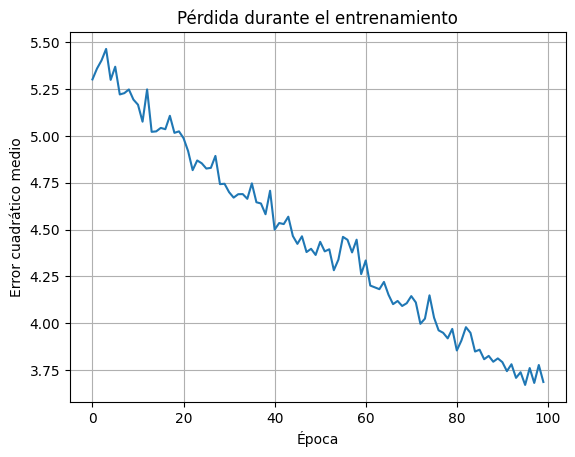

In [ ]:
import matplotlib.pyplot as plt
# 6. Visualizar la pérdida
plt.plot(history.history['loss'])
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Error cuadrático medio')
plt.grid(True)
plt.show()

#Sigmoid

Los valores de entrada se transforman a un rango entre 0 y 1, como si la nuerona interpretara probabilidades

Solo se activan significativamente las neuronas cuando la entrada esta en la zona de transicion -3 y +3

Menos **Eficiencia** (debido a cálculos exponenciales)

la red aprende de forma estable pero requiere mas cuidado

## Casos sigmoid

1. Clasificacion binaria(spam/no spam)
2. Deteccion fraudes financieros
3. Diagnostico medico
4. Modelo de riesgo crediticio
5. Redes neuronales
6. Regresion logistica
7. clasificacion de imagenes(como si fuera si/no)
8. Sistemas de alerta temprana
9. marketing (¿un usuario hara click?)


In [ ]:
# importar libs
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#cargar datos
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columnas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=columnas)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

#normalizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Dividir entrenamiento
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42)

#crear modelo
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

#compilar y entrenar
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100,batch_size=32, verbose=0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# 8. Evaluar
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Precisión en test: {accuracy:.2f}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7424 - loss: 0.5127  
Precisión en test: 0.76


## RELU + Sigmoid

ReLU se usa dentro de la red para que aprenda más rápido y de forma estable.

Sigmoid se usa al final si solo hay 2 clases posibles, como “sí/no”.

ReLU y Sigmoid no compiten, se complementan dependiendo de en qué capa y tipo de problema trabajes.

In [ ]:
# Paso 1: Importar librerías
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Paso 2: Cargar los datos
data = load_breast_cancer()
X = data.data  # características
y = data.target  # etiquetas (0: benigno, 1: maligno)

# Paso 3: Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Paso 4: Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Paso 5: Crear el modelo con capas ocultas ReLU y salida Sigmoid
model = Sequential([
    Dense(16, activation='relu', input_shape=(X.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # ¡Aquí usamos Sigmoid!
])

# Paso 6: Compilar y entrenar
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4540 - loss: 0.7965
Epoch 2/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8284 - loss: 0.5821 
Epoch 3/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.4271 
Epoch 4/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8927 - loss: 0.3129 
Epoch 5/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9194 - loss: 0.2366 
Epoch 6/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9440 - loss: 0.1835 
Epoch 7/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.1496 
Epoch 8/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.1395
Epoch 9/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9750 - loss: 0.1312 
Epoch 10/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0890 
Epoch 11/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9809 - loss: 0.0982 
Epoch 12/20
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9903 - loss

In [ ]:
# Paso 7: Evaluar
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nPrecisión en test: {accuracy:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9578 - loss: 0.0863  

Precisión en test: 0.96


# Tanh

Los valores de entrada se transforman a un rango entre -1 y 1, permitiendo que la neurona represente tanto activaciones negativas como positivas.

Las neuronas se activan principalmente cuando la entrada está en la zona de transición entre -2 y +2.

Es más estable que sigmoid para el aprendizaje porque su salida está centrada en cero, lo que evita sesgos en las activaciones.

Menos eficiente en redes profundas debido a que puede sufrir del problema del vanishing gradient (cuando los valores son muy extremos, el modelo aprende muy lento).

Ideal para tareas donde los datos tengan valores negativos y positivos, como señales o series temporales.



##  Casos de uso
1. series temporales (prediccion clima,acciones)
2. Redes (LSTM,RNN y GRU)
3. procesamiento señales EEG ECG
4. Reconocimiento de voz(sentiminetos)
5. predecir rendimiento academicos(varaibles como estres -1 al 1y satisfaccion escuela -1 al 1)
6. modelos encader (reducir el tamaño de una imagen blanco y negro almacenar y recontruirla)
7. modelos de puntuacion (analisis de reseñas de prodcutos y claisifcar con sentimiento positivo o negativo)
8. Control de sistemas dinamicos(dron autonoma que ajusta su direcion -1  izquierda 0 mantenerse o girar a l derecha +1 arriba +1 abajo -1)
9. Clasificacion binario con valores centrados (predecir correo es spam o no, caracteristicas de ciertas palabras)
10. Reconocimiento de imagenes escala de grises

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

#cargar datos
iris = load_iris()
X = iris.data
y = iris.target

#escalar para dalos compatibles
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#convertir etiquetas a one-hot
y_onehot = tf.keras.utils.to_categorical(y, num_classes=3)

#dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

#modelo
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation='tanh', input_shape=(X_train.shape[1:])),  # Corregido input_shape
    tf.keras.layers.Dense(3, activation='softmax')  # ¡Cambiado a softmax para clasificación!
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=8,
    validation_split=0.2,
    verbose=0
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

## 5. Resultados y visualización
print(f"\nPrecisión en test: {test_acc:.4f}")


Precisión en test: 0.9333


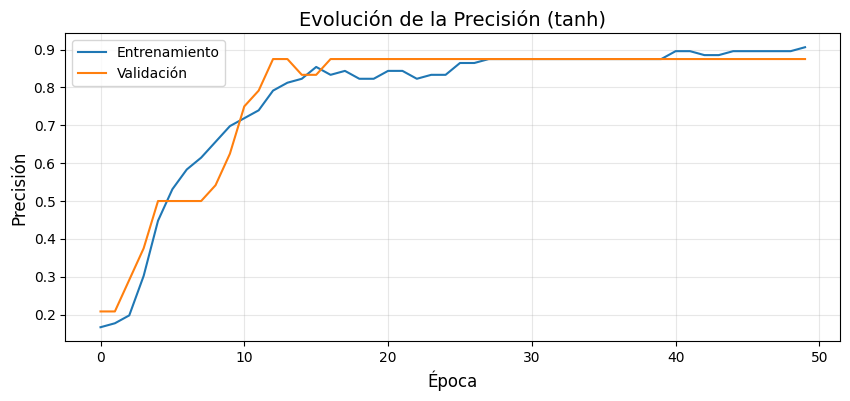

In [9]:
# Gráfica de precisión durante entrenamiento
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Evolución de la Precisión (tanh)', fontsize=14)
plt.ylabel('Precisión', fontsize=12)
plt.xlabel('Época', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

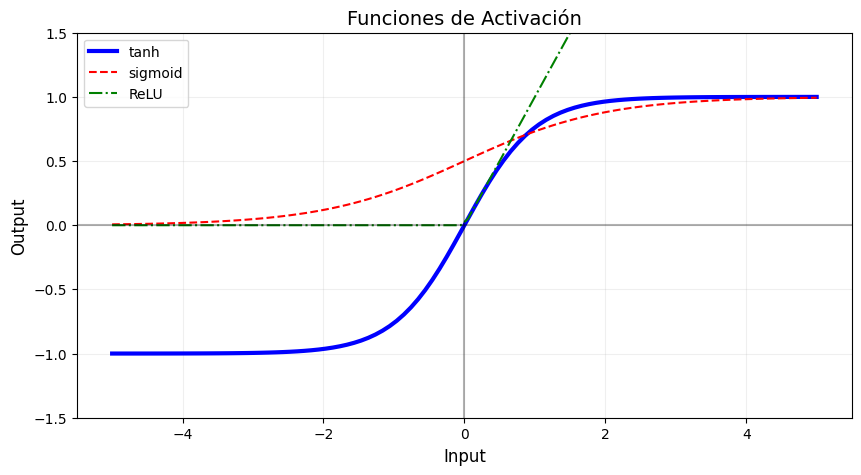

In [11]:
x = np.linspace(-5, 5, 100)
tanh = np.tanh(x)
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, tanh, label='tanh', linewidth=3, color='blue')
plt.plot(x, sigmoid, label='sigmoid', linestyle='--', color='red')
plt.plot(x, relu, label='ReLU', linestyle='-.', color='green')
plt.title("Funciones de Activación", fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.ylim(-1.5, 1.5)
plt.xlabel("Input", fontsize=12)
plt.ylabel("Output", fontsize=12)
plt.legend()
plt.grid(True, alpha=0.2)
plt.show()